In [1]:
import pandas as pd

from prepare import *
from acquire import *

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *
import explore as e

In [2]:
#set seaborn color pallete
sns.set_palette('plasma')
pal = sns.set_palette('plasma')
palette = sns.color_palette().as_hex()

In [3]:
df, revert_key, replace_key = wrangle_data()

df = df.replace(replace_key)

In [4]:
train, validate, test = train_validate_test_split(df, 'is_pes')

In [217]:
train_age, val_age, test_age = train_validate_test_split(df, 'age')

In [21]:
train[train.columns[110:]]

,marital_status,religion,evangelical_christian,church_attendance,political_party_identity,political_party_lean,summary_of_political_party_data,family_income_nine_categories,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
1859,Divorced,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Seldom,Independent,The Democratic Party,Dem/Lean Dem,"$20,000 to less than $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,3.057078,0,1,0,0
96,Divorced,Roman Catholic,"No, not born-again or evangelical Christian",Once a week,Democrat,nan,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999","You are PROBABLY registered, but there is a ch...",Liberal,Internet User,No,0.433484,1,2,0,0
420,Divorced,Agnostic,nan,Never,Independent,The Democratic Party,Dem/Lean Dem,"$40,000 to less than $50,000","$30-$74,999",nan,Liberal,Internet User,No,2.413983,0,1,0,0
1424,Never been married,Roman Catholic,"No, not born-again or evangelical Christian",Once or twice a month,Democrat,nan,Dem/Lean Dem,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.362586,0,1,0,0
114,Divorced,Roman Catholic,"Yes, born-again or evangelical Christian",Once a week,Independent,The Democratic Party,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.303046,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Married,Nothing in particular,nan,Seldom,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,2.336849,1,2,0,0
957,Married,Roman Catholic,"No, not born-again or evangelical Christian",A few times a year,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.553714,0,1,0,0
239,Married,Mormon (Church of Jesus Christ of Latter-day S...,"No, not born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$150,000 or more","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,1.368277,0,1,0,0
1795,Married,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,1.338218,0,1,0,0


In [6]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
        
 
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_plot(df, x_val, target):
        sns.barplot(x=x_val,y=target,data=df)
        plt.tight_layout()
        plt.show()
        
    def count_plot(df, col):
        plt.figure(figsize=(8,5))
        sns.countplot(x=col ,data=df)
        
        plt.tight_layout()
        plt.show()

## Let's explore age groups and income-related topics

In [7]:
income = ['family_income_three_categories', 'family_income_nine_categories', 'happen_wealthgap', 
         'share_americans_in_upper_class', 'share_americans_in_middle_class', 'share_americans_in_lower_class']

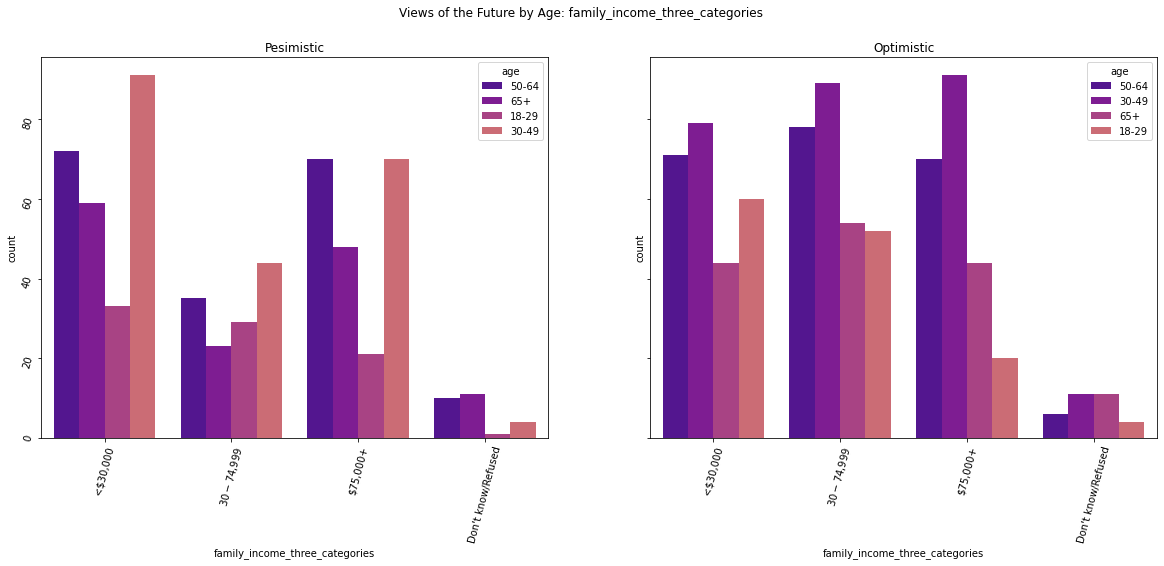

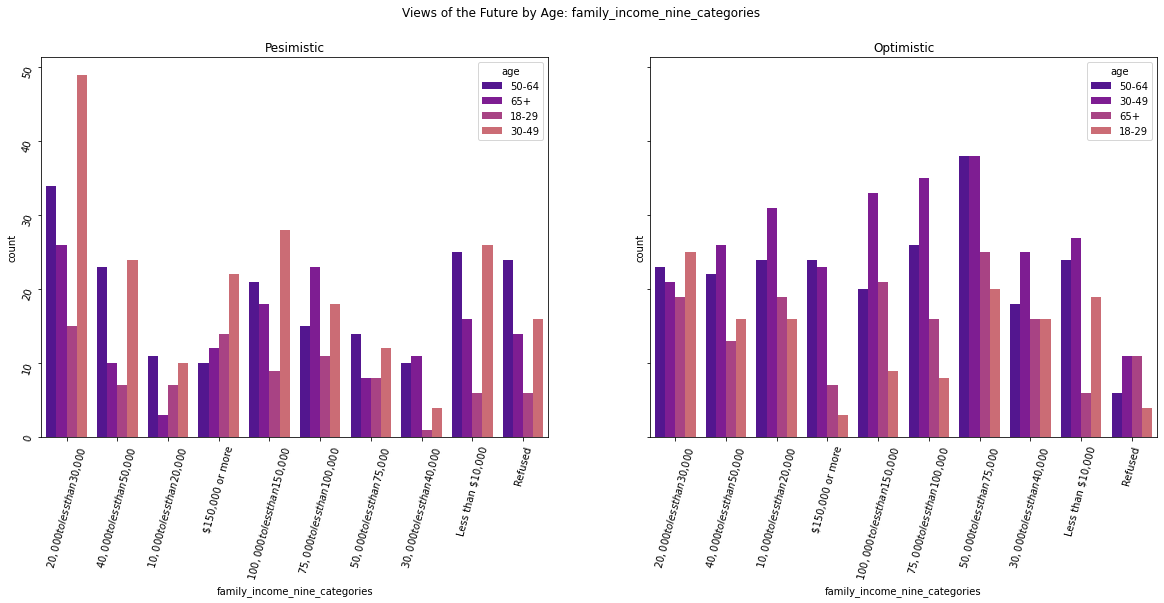

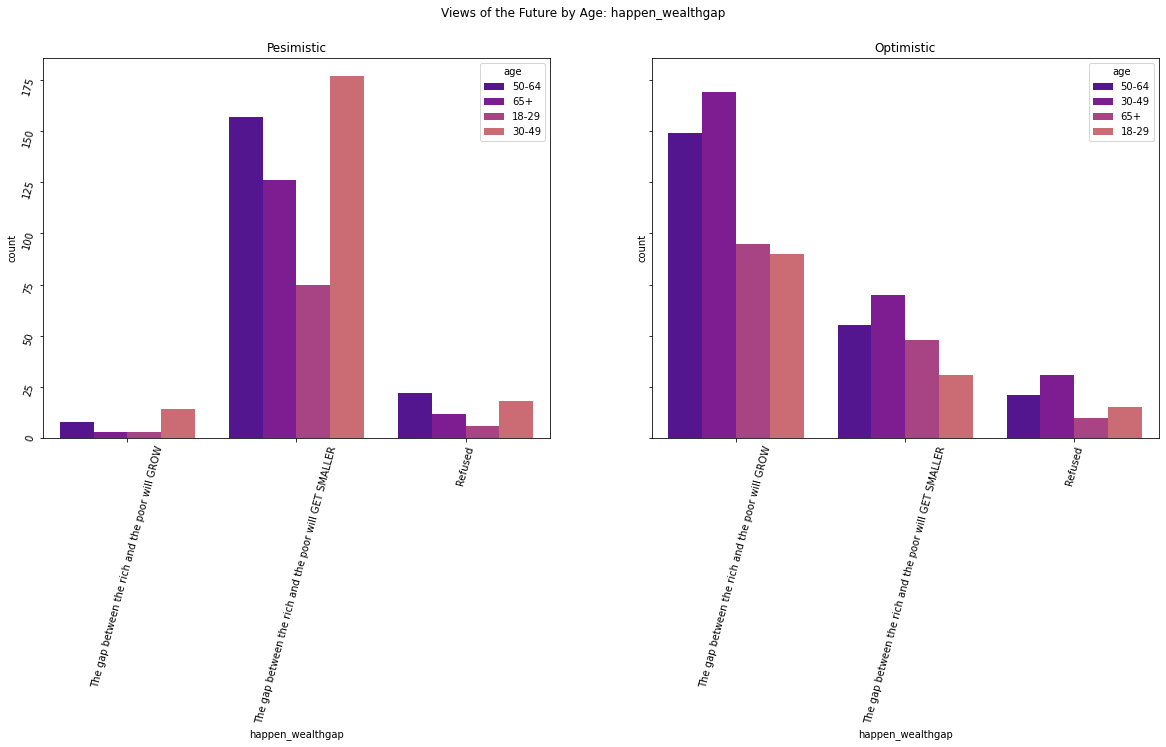

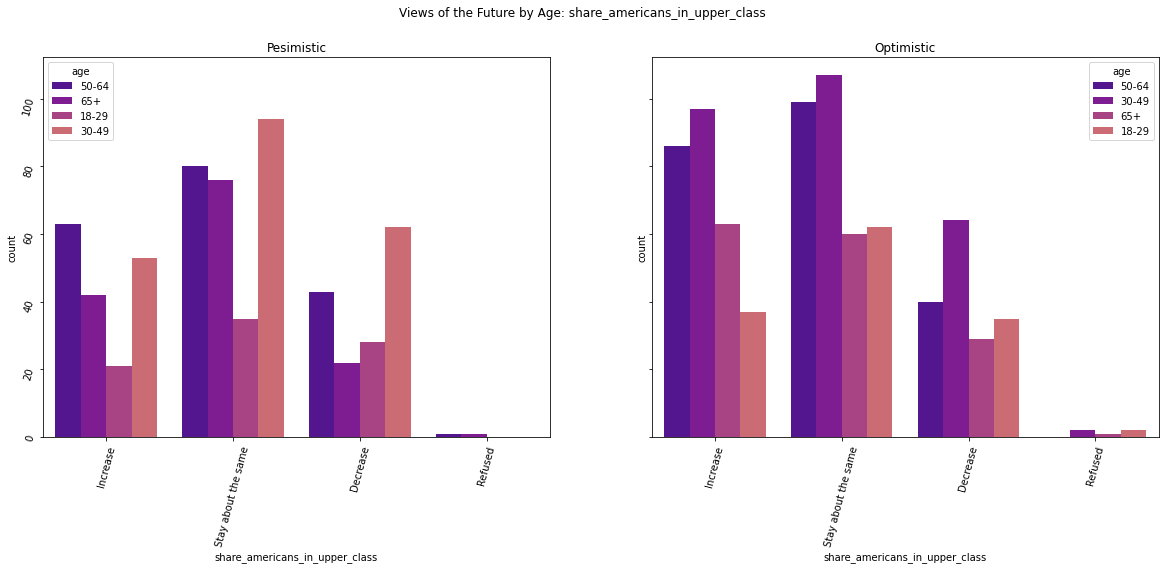

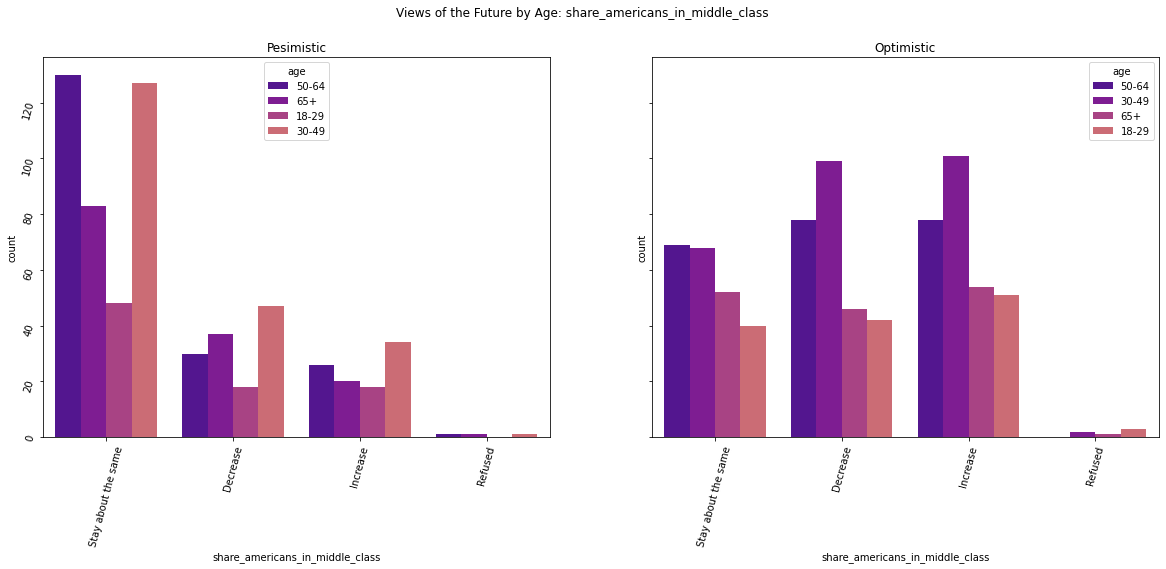

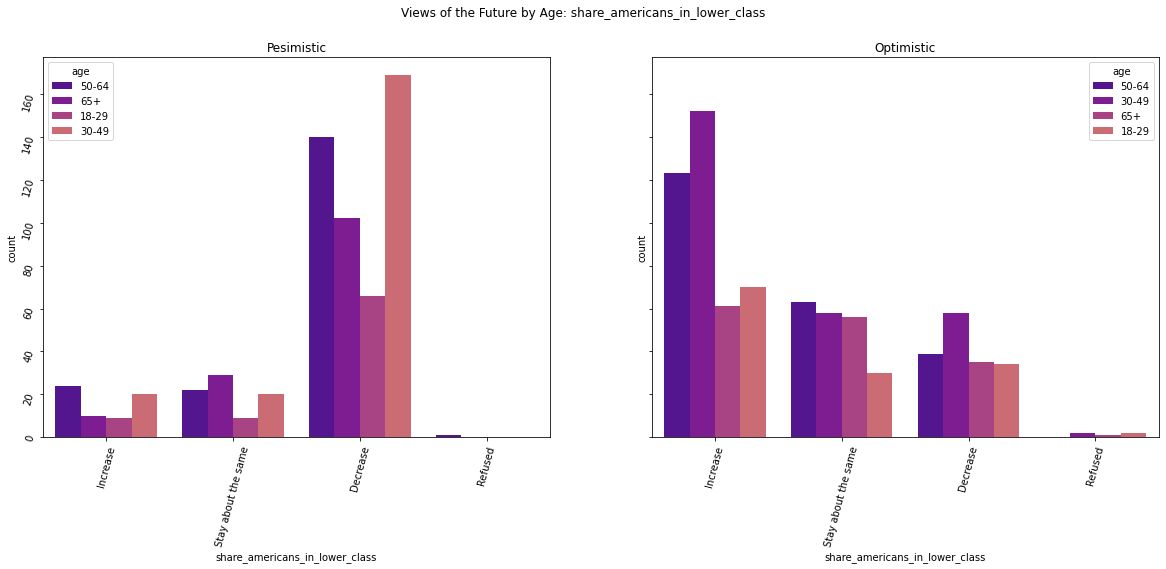

In [8]:
for col in income:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [17]:
df.columns[90:]

Index(['sci_tech', 'major_corps', 'rel_groups', 'gov_in_wash', 'state_local',
       'media', 'military', 'college_uni', 'schools', 'metro', 'census_region',
       'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [12]:
train.family_income_nine_categories.value_counts()

$50,000 to less than $75,000      245
$100,000 to less than $150,000    159
$75,000 to less than $100,000     158
$20,000 to less than $30,000      146
$30,000 to less than $40,000      142
$40,000 to less than $50,000      141
$10,000 to less than $20,000      133
$150,000 or more                  117
Less than $10,000                 108
Refused                            59
Name: family_income_nine_categories, dtype: int64

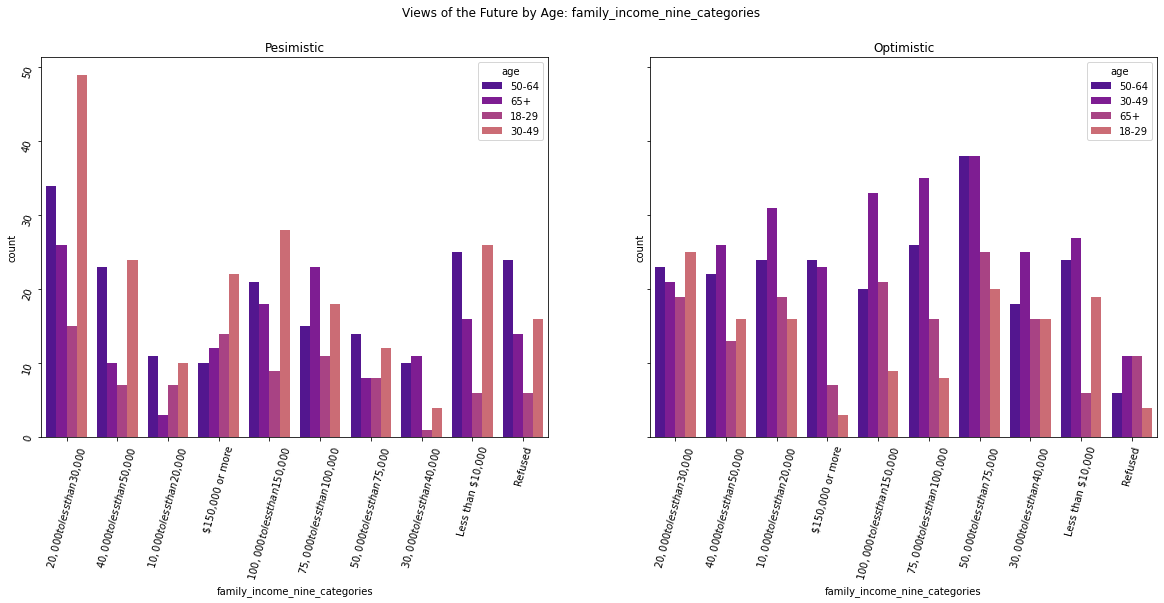

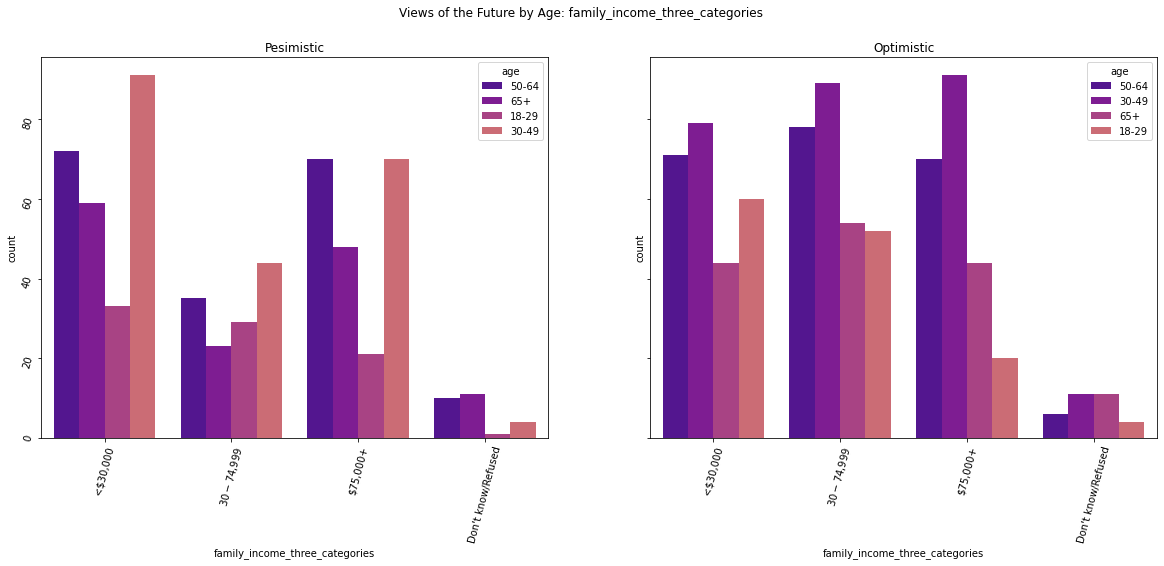

In [14]:
for col in ['family_income_nine_categories', 'family_income_three_categories']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

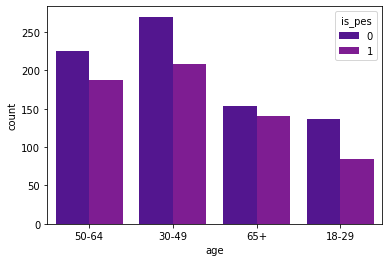

In [27]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')
plt.show()

In [40]:
pes_percent = []

In [245]:
edu_percent = pd.crosstab(index=train['age'], columns=, columns=train['highest_education_six_categories'])
edu_percent

SyntaxError: invalid syntax (<ipython-input-245-85c73824a53c>, line 1)

In [78]:
df.columns

Index(['qkey', 'device_type', 'language', 'form', 'attitude', 'avg_family',
       'happen_general', 'happen_health', 'happen_race', 'happen_usa',
       ...
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object', length=128)

In [84]:
pol_party_percent = pd.crosstab(index=df['age'], columns=train['political_views'], normalize='index')
pol_party_percent

political_views,Conservative,Liberal,Moderate,Refused,Very conservative,Very liberal
age,,,,,,
18-29,0.118182,0.259091,0.409091,0.031818,0.036364,0.145455
30-49,0.208768,0.198330,0.421712,0.020877,0.058455,0.091858
50-64,0.250000,0.143204,0.419903,0.029126,0.087379,0.070388
65+,0.333333,0.176871,0.316327,0.006803,0.108844,0.057823
DK/REF,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000


In [81]:
df.political_views.value_counts()

Moderate             977
Conservative         570
Liberal              480
Very liberal         213
Very conservative    204
Refused               71
Name: political_views, dtype: int64

---
---
---

# Univariate

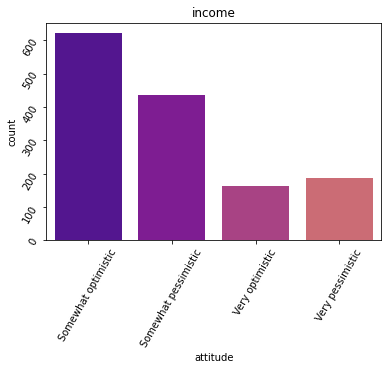

In [139]:
sns.countplot(data=train, x='attitude').set_title('income')
plt.tick_params(labelrotation=60)
plt.show()

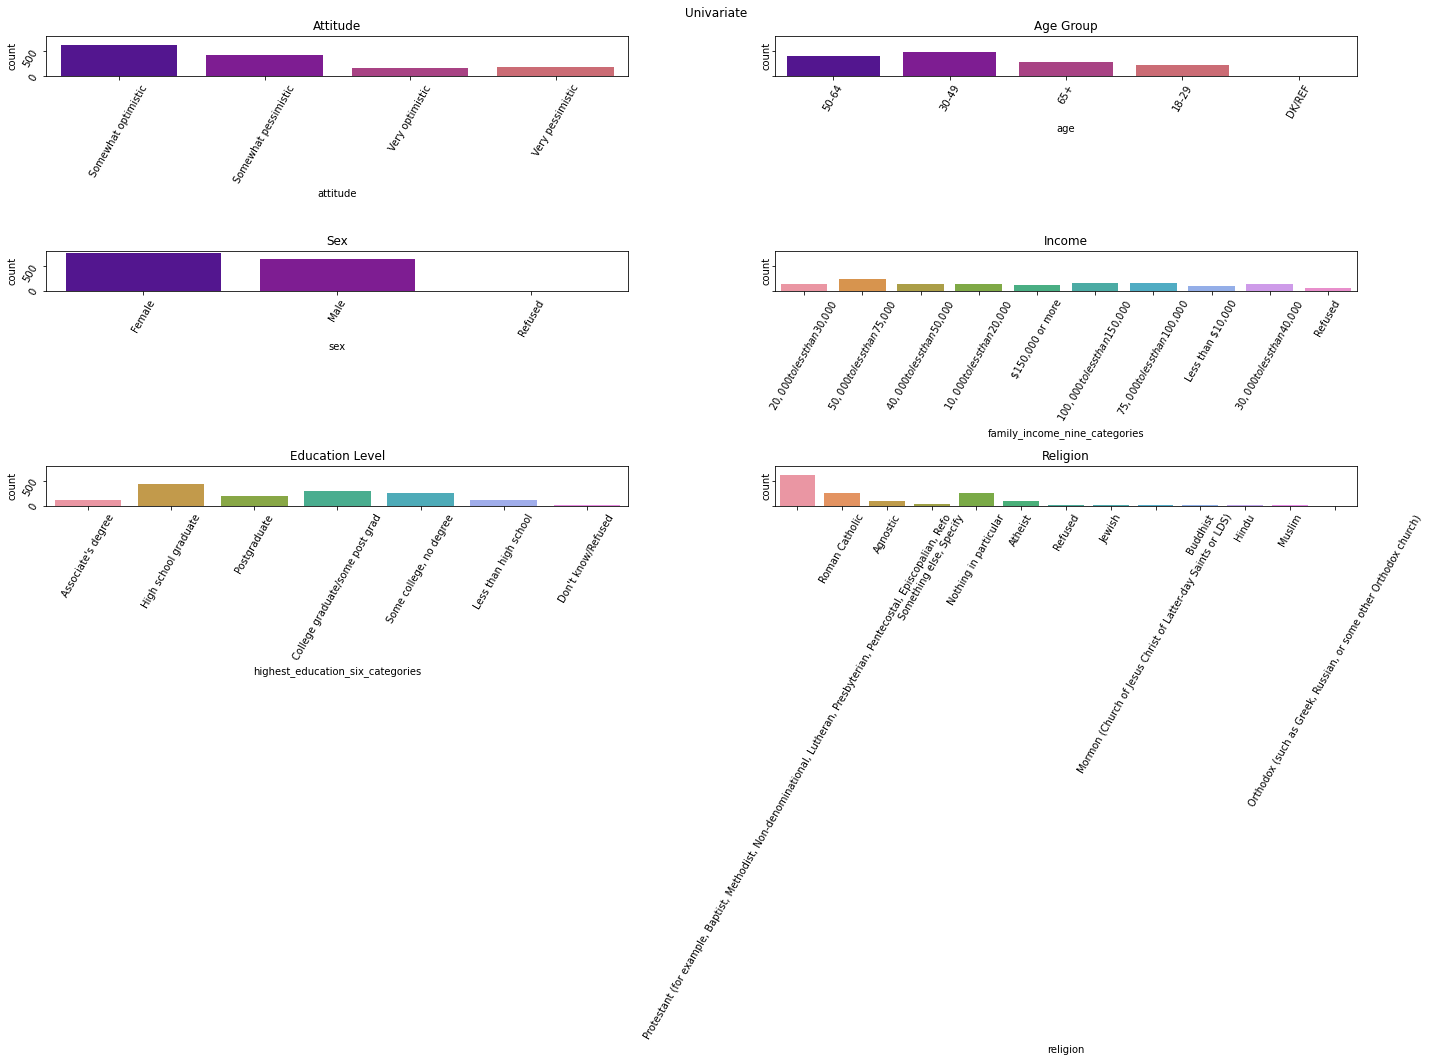

In [267]:
#for col in ['attitude', 'age', 'sex', 'education', 'income']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=False,  figsize=(20,15))

# Set suptitle
fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train, x='attitude', ax=axes[0,0]).set_title('Attitude')
axes[0,0].tick_params(labelrotation=60)

# Second plot and its title
sns.countplot(data=train, x='age', ax=axes[0,1]).set_title('Age Group')
axes[0,1].tick_params(labelrotation=60)

# Third plot and its title
sns.countplot(data=train, x='sex', ax=axes[1,0]).set_title('Sex')
axes[1,0].tick_params(labelrotation=60)

# Fourth plot and its title
sns.countplot(data=train, x='family_income_nine_categories', ax=axes[1,1]).set_title('Income')
axes[1,1].tick_params(labelrotation=60)

# Fifth plot and its title
sns.countplot(data=train, x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level')
axes[2,0].tick_params(labelrotation=60)

# Sixth plot and its title
sns.countplot(data=train, x='religion', ax=axes[2,1]).set_title('Religion')
axes[2,1].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

---
---
---

In [147]:
train.attitude

1859     Somewhat optimistic
96      Somewhat pessimistic
420      Somewhat optimistic
1424     Somewhat optimistic
114     Somewhat pessimistic
                ...         
678     Somewhat pessimistic
957      Somewhat optimistic
239      Somewhat optimistic
1795     Somewhat optimistic
1297     Somewhat optimistic
Name: attitude, Length: 1408, dtype: object

In [162]:
pd.pivot_table(train, index='age', columns='attitude').pes_val

attitude,Somewhat optimistic,Somewhat pessimistic,Very optimistic,Very pessimistic
age,,,,
18-29,1.0,2.0,0.0,3.0
30-49,1.0,2.0,0.0,3.0
50-64,1.0,2.0,0.0,3.0
65+,1.0,2.0,0.0,3.0
DK/REF,NaN,2.0,0.0,3.0


In [199]:
military=[]
[military.append(col) for col in df.columns if col.__contains__('military')]
military

['priority_reduce_military', 'priority_increase_military', 'military']

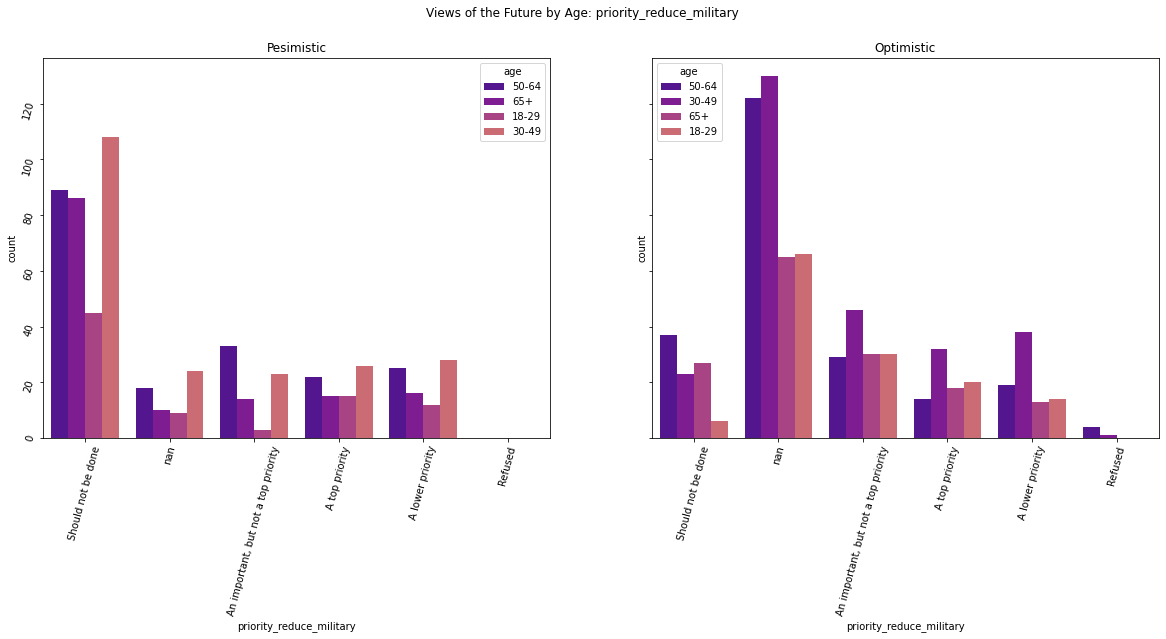

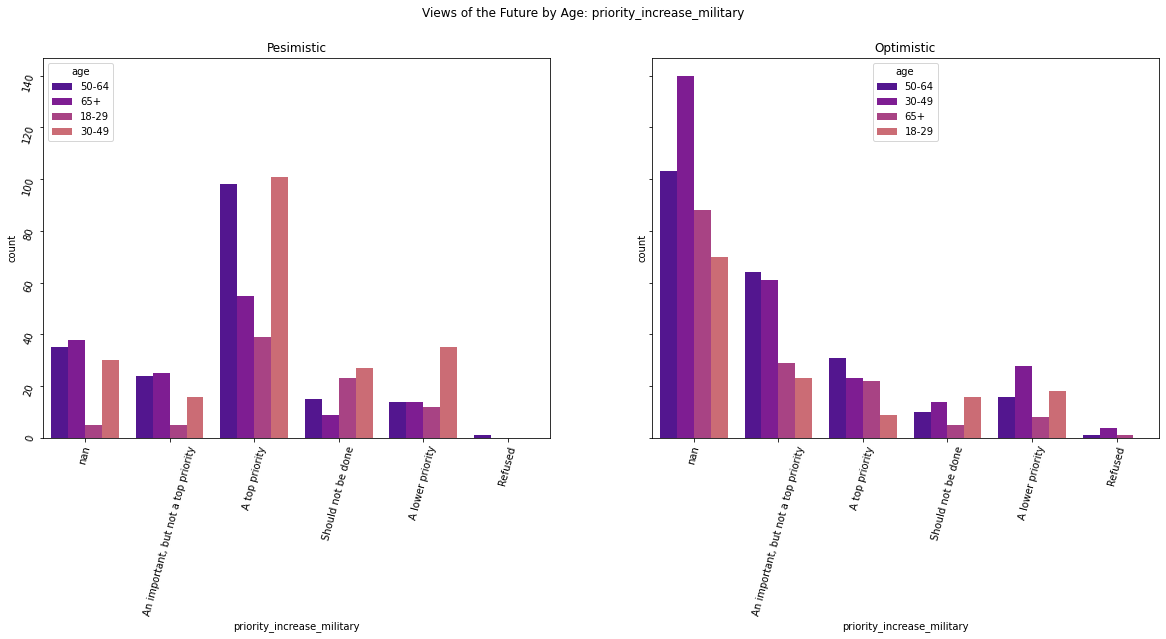

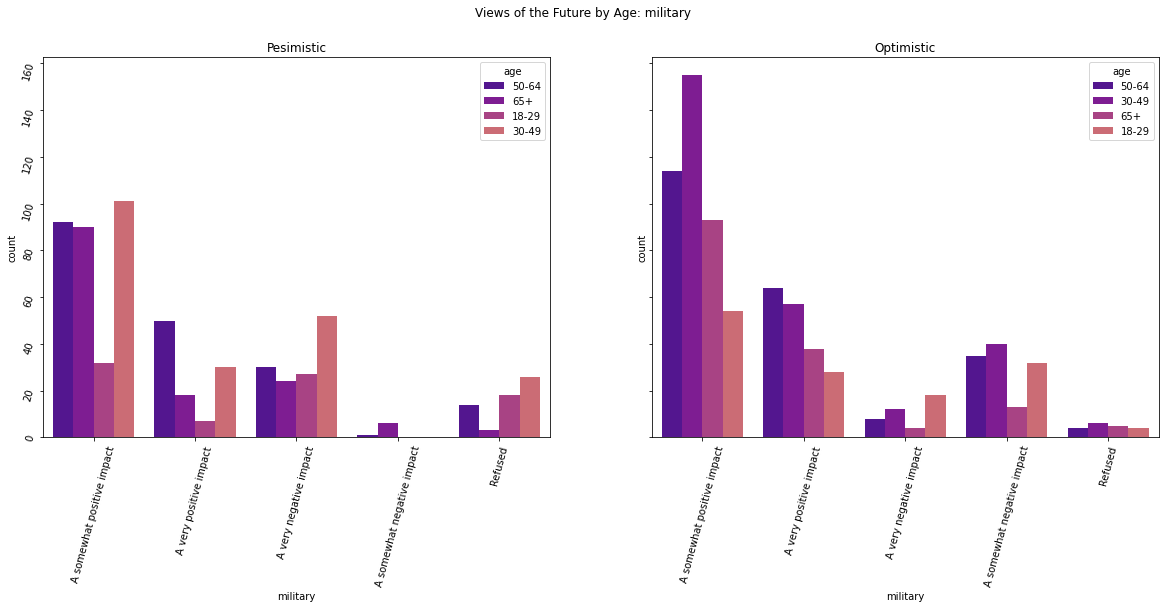

In [200]:
for col in military:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

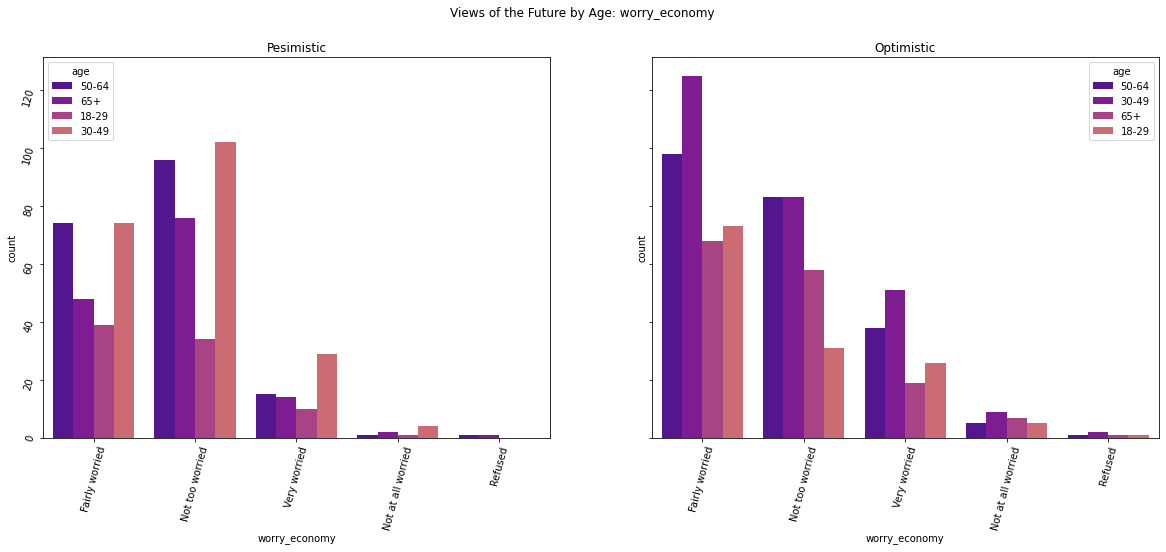

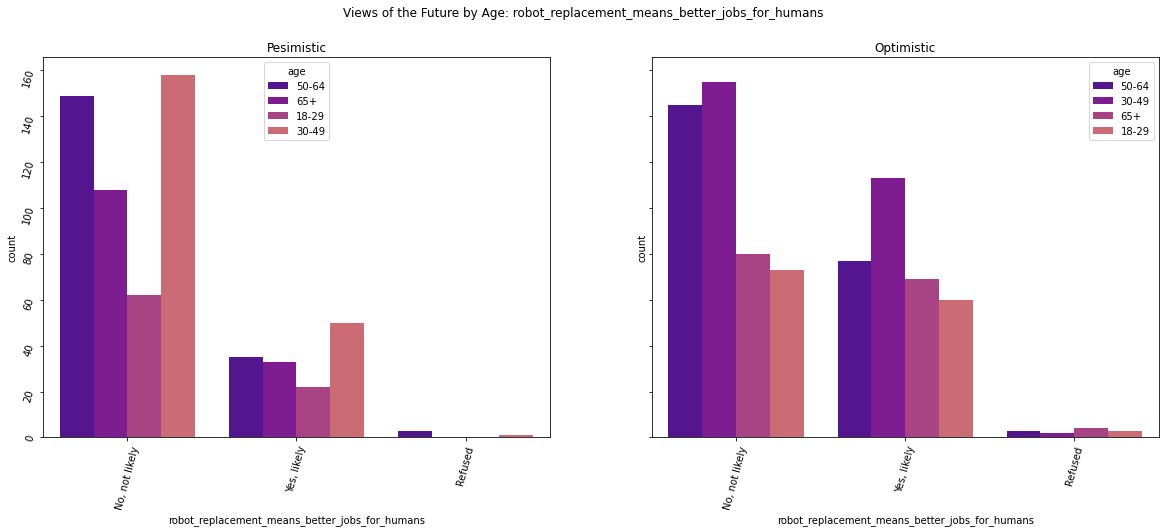

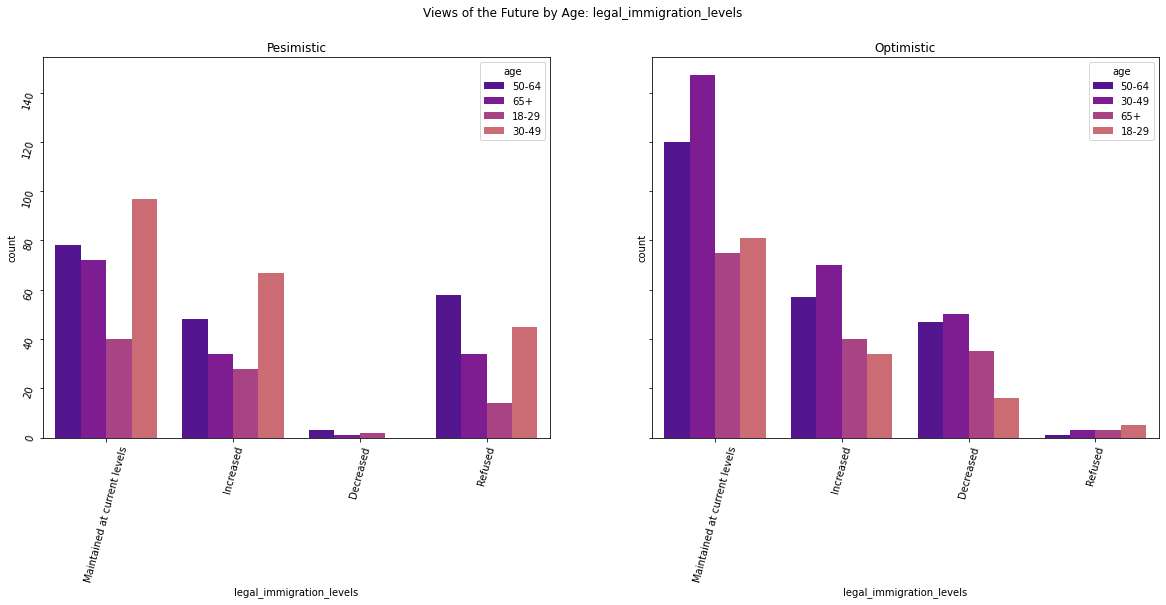

In [201]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

<AxesSubplot:xlabel='age'>

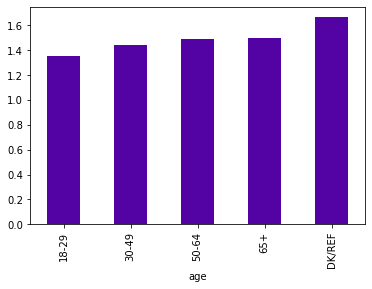

In [215]:
train.groupby('age').pes_val.mean().plot(kind='bar')

In [216]:
train.groupby('place').pes_val.mean().plot(kind='bar')

DataError: No numeric types to aggregate

In [233]:
pd.pivot_table(data=train_age, index='age', values='is_pes', margins=True)

,is_pes
age,
18-29,0.395455
30-49,0.448352
50-64,0.502392
65+,0.460064
DK/REF,0.500000
All,0.458807


In [260]:
pd.crosstab(index=[train_age.age, train_age.is_pes],
            columns=train_age.family_income_three_categories,
            colnames=['income'], normalize='index')

income         $30-$74,999  $75,000+  <$30,000  Don't know/Refused
age    is_pes                                                     
18-29  0          0.353383  0.180451  0.451128            0.015038
       1          0.356322  0.241379  0.379310            0.022989
30-49  0          0.338645  0.342629  0.298805            0.019920
       1          0.377451  0.362745  0.240196            0.019608
50-64  0          0.322115  0.298077  0.331731            0.048077
       1          0.357143  0.366667  0.228571            0.047619
65+    0          0.337278  0.307692  0.278107            0.076923
       1          0.416667  0.312500  0.201389            0.069444
DK/REF 0          0.000000  0.000000  1.000000            0.000000
       1          0.000000  0.000000  1.000000            0.000000

In [262]:
df.columns[100:]

Index(['census_region', 'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [263]:
pd.crosstab(index=[train_age.age, train_age.is_pes],
            columns=train_age.religion,
            colnames=['income'], normalize='index')

income         Agnostic   Atheist  Buddhist     Hindu    Jewish  \
age    is_pes                                                     
18-29  0       0.090226  0.052632  0.007519  0.015038  0.007519   
       1       0.195402  0.160920  0.011494  0.011494  0.045977   
30-49  0       0.055777  0.067729  0.003984  0.011952  0.007968   
       1       0.093137  0.102941  0.000000  0.004902  0.009804   
50-64  0       0.028846  0.019231  0.000000  0.000000  0.024038   
       1       0.042857  0.033333  0.000000  0.000000  0.038095   
65+    0       0.035503  0.047337  0.005917  0.000000  0.017751   
       1       0.062500  0.104167  0.006944  0.000000  0.027778   
DK/REF 0       0.000000  0.000000  0.000000  0.000000  0.000000   
       1       0.000000  0.000000  0.000000  0.000000  0.000000   

income         Mormon (Church of Jesus Christ of Latter-day Saints or LDS)  \
age    is_pes                                                                
18-29  0                                                0.030075             
       1                                                0.022989             
30-49  0                                                0.019920             
       1                                                0.014706             
50-64  0                                                0.000000             
       1                                                0.004762             
65+    0                                                0.005917             
       1                                                0.020833             
DK/REF 0                                                0.000000             
       1                                                0.000000             

income           Muslim  Nothing in particular  \
age    is_pes                                    
18-29  0       0.022556               0.323308   
       1       0.022989               0.195402   
30-49  0       0.000000               0.239044   
       1       0.000000               0.215686   
50-64  0       0.004808               0.168269   
       1       0.000000               0.147619   
65+    0       0.011834               0.094675   
       1       0.000000               0.104167   
DK/REF 0       0.000000               0.000000   
       1       0.000000               0.000000   

income         Orthodox (such as Greek, Russian, or some other Orthodox church)  \
age    is_pes                                                                     
18-29  0                                                0.000000                  
       1                                                0.000000                  
30-49  0                                                0.000000                  
       1                                                0.009804                  
50-64  0                                                0.004808                  
       1                                                0.004762                  
65+    0                                                0.000000                  
       1                                                0.000000                  
DK/REF 0                                                0.000000                  
       1                                                0.000000                  

income         Protestant (for example, Baptist, Methodist, Non-denominational, Lutheran, Presbyterian, Pentecostal, Episcopalian, Refo  \
age    is_pes                                                                                                                             
18-29  0                                                0.285714                                                                          
       1                                                0.160920                                                                          
30-49  0                                                0.362550                                        

In [269]:
df.race.value_counts()

White                        1872
Black or African American     306
Mixed Race                    114
Or some other race            103
Refused                        64
Asian or Asian-American        56
Name: race, dtype: int64

In [ ]:
df.race.value_counts()